# TP Clustering - Partie 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

## Méthode K-Means

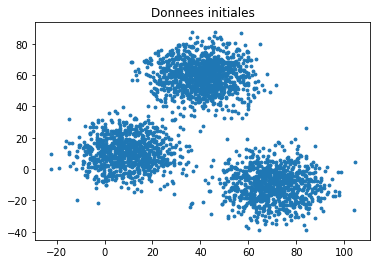

In [3]:
from scipy.io import arff

path = './artificial/'
databrut = arff.loadarff(open(path + "xclara.arff","r"))
data = [[x[0], x[1]] for x in databrut[0]]

f0 = [f[0] for f in data]
f1 = [f[1] for f in data]

plt.scatter(f0, f1, s=8)
plt.title("Donnees initiales")
plt.show()

Exemple avec 3 clusters :

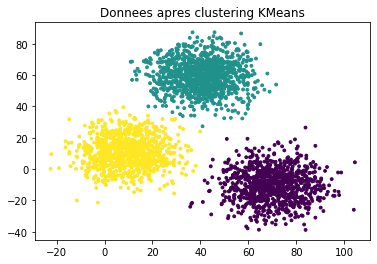

nb clusters =  3 , nb iter =  3 , runtime =  131.47  ms


In [4]:
from sklearn import cluster
datanp = data
def kmean(k,datanp):
    tps1 = time.time()

    model = cluster.KMeans(n_clusters = k, init = 'k-means++')

    model.fit(datanp)
    tps2 = time.time()
    labels = model.labels_
    iteration = model.n_iter_
    return labels,tps1,tps2,iteration

k=3
labels,tps1,tps2,iteration = kmean(k,data)
labelsKMean = labels
plt.scatter(f0, f1, c=labels, s=8)
plt.title("Donnees apres clustering KMeans")
plt.show()
print("nb clusters = ",k,", nb iter = ",iteration,", runtime = ",round((tps2-tps1)*1000,2)," ms")

### Calcul de silhouette

In [5]:
path = './artificial/'
databrut = arff.loadarff(open(path + "xclara.arff","r"))
data = [[x[0], x[1]] for x in databrut[0]]

f0 = [f[0] for f in data]
f1 = [f[1] for f in data]
datanp = data

In [36]:
#Creation d'un graphique
def graph(l,name):
    plt.bar([i for i in range(2,len(l)+2)],l) 
    plt.title('Indice de '+name)
    plt.xlabel('# of Clusters')
    plt.ylabel('Score')
    plt.show()

Training 2 cluster algo...
Training 3 cluster algo...
Training 4 cluster algo...
Training 5 cluster algo...
Training 6 cluster algo...
Training 7 cluster algo...
Training 8 cluster algo...
Runtime =  2566.58  ms

Silhouette SCORE :


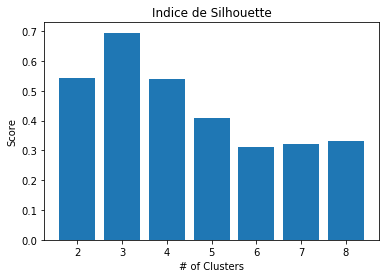

Nombre clusters =  3

Davies-Bouldin SCORE :


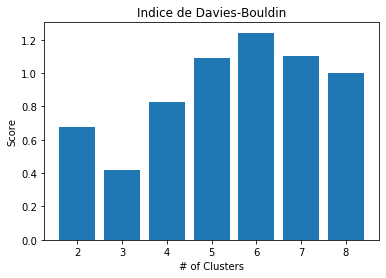

Nombre clusters =  3

Calinski-Harabasz SCORE :


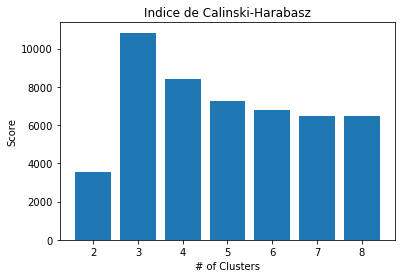

Nombre clusters =  3


In [38]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import KMeans
sil_score_list = []
dv_score_list = []
ch_score_list = []

# Calcul des métriques
tps1 = time.time()
min_cluster = 2
max_cluster = 9
for i in range(min_cluster,max_cluster):
    print('Training {} cluster algo...'.format(i))
    km = KMeans(n_clusters=i)
    km.fit(datanp)
    sil_score = silhouette_score(np.array(datanp),km.predict(datanp))
    dv_score  = davies_bouldin_score(np.array(datanp),km.predict(datanp))
    ch_score  = calinski_harabasz_score(np.array(datanp),km.predict(datanp))
    sil_score_list.append(sil_score)
    dv_score_list.append(dv_score)
    ch_score_list.append(ch_score)
tps2 = time.time()

print("Runtime = ",round((tps2-tps1)*1000,2)," ms")

#Courbe silhouette
print()
print("Silhouette SCORE :")
graph(sil_score_list, "Silhouette")
nbMax = np.max(sil_score_list) # Le meilleur score est le maximum
indexMax = sil_score_list.index(nbMax) + min_cluster
print("Nombre clusters = ",indexMax)

#Courbe Davies-Bouldin
print()
print("Davies-Bouldin SCORE :")
graph(dv_score_list, "Davies-Bouldin")
nbMax = np.min(dv_score_list) # Le meilleur score est le minimum
indexMax = dv_score_list.index(nbMax) + min_cluster
print("Nombre clusters = ",indexMax)

#Courbe Calinski-Harabasz
print()
print("Calinski-Harabasz SCORE :")
graph(ch_score_list, "Calinski-Harabasz")
nbMax = np.max(ch_score_list)# Le score est le maximum
indexMax = ch_score_list.index(nbMax) + min_cluster
print("Nombre clusters = ",indexMax)

Le calcul des métriques nous indique que le nombre optimal de cluster est de 3

### Limites de K-Means

Pour les jeux de données en spiral, en rings et en smile, la méthode k-means va avoir du mal a déterminer les clusters :

SPIRAL :

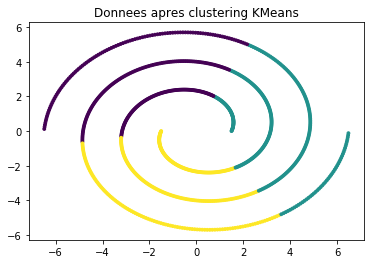

nb clusters =  3 , nb iter =  7 , runtime =  120.37  ms


In [44]:
path = './artificial/'
databrut = arff.loadarff(open(path + "spiral.arff","r"))
data = [[x[0], x[1]] for x in databrut[0]]

f0 = [f[0] for f in data]
f1 = [f[1] for f in data]

k=3
labels,tps1,tps2,iteration = kmean(k,data)

plt.scatter(f0, f1, c=labels, s=8)
plt.title("Donnees apres clustering KMeans")
plt.show()
print("nb clusters = ",k,", nb iter = ",iteration,", runtime = ",round((tps2-tps1)*1000,2)," ms")

Training 2 cluster algo...
Training 3 cluster algo...
Training 4 cluster algo...
Training 5 cluster algo...
Training 6 cluster algo...
Training 7 cluster algo...
Training 8 cluster algo...
Runtime =  2092.63  ms

Silhouette SCORE :


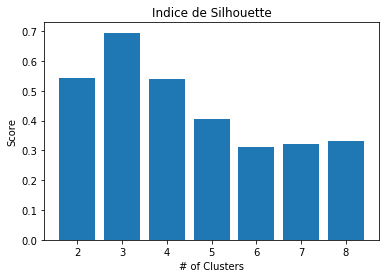

Nombre clusters =  3

Davies-Bouldin SCORE :


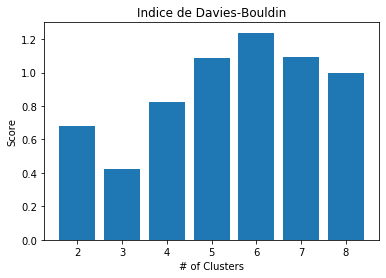

Nombre clusters =  3

Calinski-Harabasz SCORE :


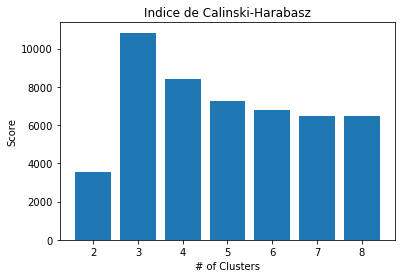

Nombre clusters =  3


In [46]:
# Calcul des métriques
sil_score_list = []
dv_score_list = []
ch_score_list = []

tps1 = time.time()
min_cluster = 2
max_cluster = 9
for i in range(min_cluster,max_cluster):
    print('Training {} cluster algo...'.format(i))
    km = KMeans(n_clusters=i)
    km.fit(datanp)
    sil_score = silhouette_score(np.array(datanp),km.predict(datanp))
    dv_score  = davies_bouldin_score(np.array(datanp),km.predict(datanp))
    ch_score  = calinski_harabasz_score(np.array(datanp),km.predict(datanp))
    sil_score_list.append(sil_score)
    dv_score_list.append(dv_score)
    ch_score_list.append(ch_score)
tps2 = time.time()

print("Runtime = ",round((tps2-tps1)*1000,2)," ms")

#Courbe silhouette
print()
print("Silhouette SCORE :")
graph(sil_score_list, "Silhouette")
nbMax = np.max(sil_score_list) # Le meilleur score est le maximum
indexMax = sil_score_list.index(nbMax) + min_cluster
print("Nombre clusters = ",indexMax)

#Courbe Davies-Bouldin
print()
print("Davies-Bouldin SCORE :")
graph(dv_score_list, "Davies-Bouldin")
nbMax = np.min(dv_score_list) # Le meilleur score est le minimum
indexMax = dv_score_list.index(nbMax) + min_cluster
print("Nombre clusters = ",indexMax)

#Courbe Calinski-Harabasz
print()
print("Calinski-Harabasz SCORE :")
graph(ch_score_list, "Calinski-Harabasz")
nbMax = np.max(ch_score_list)# Le score est le maximum
indexMax = ch_score_list.index(nbMax) + min_cluster
print("Nombre clusters = ",indexMax)

RINGS

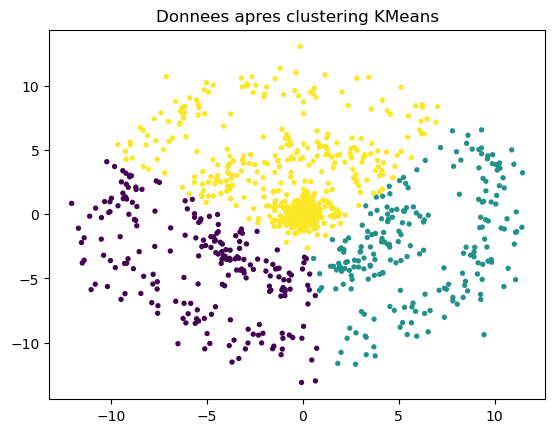

nb clusters =  3 , nb iter =  11 , runtime =  35.53  ms


In [75]:
path = './artificial/'
databrut = arff.loadarff(open(path + "rings.arff","r"))
data = [[x[0], x[1]] for x in databrut[0]]

f0 = [f[0] for f in data]
f1 = [f[1] for f in data]

k=3
labels,tps1,tps2,iteration = kmean(k,data)

plt.scatter(f0, f1, c=labels, s=8)
plt.title("Donnees apres clustering KMeans")
plt.show()
print("nb clusters = ",k,", nb iter = ",iteration,", runtime = ",round((tps2-tps1)*1000,2)," ms")

SMILE1

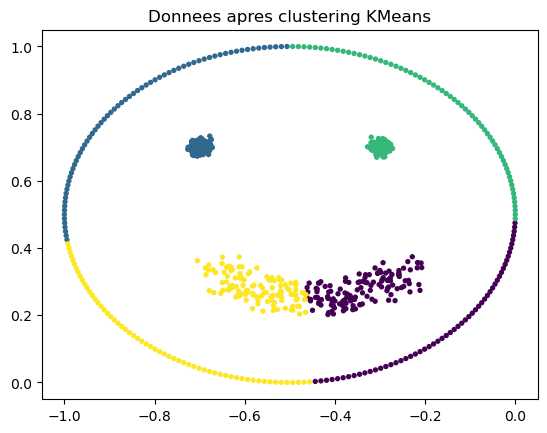

nb clusters =  4 , nb iter =  4 , runtime =  34.65  ms


In [76]:
path = './artificial/'
databrut = arff.loadarff(open(path + "smile1.arff","r"))
data = [[x[0], x[1]] for x in databrut[0]]

f0 = [f[0] for f in data]
f1 = [f[1] for f in data]

k=4
labels,tps1,tps2,iteration = kmean(k,data)

plt.scatter(f0, f1, c=labels, s=8)
plt.title("Donnees apres clustering KMeans")
plt.show()
print("nb clusters = ",k,", nb iter = ",iteration,", runtime = ",round((tps2-tps1)*1000,2)," ms")

## Méthode K-Medoids

On reprend le dataset initial

In [77]:
path = './artificial/'
databrut = arff.loadarff(open(path + "xclara.arff","r"))
data = [[x[0], x[1]] for x in databrut[0]]

f0 = [f[0] for f in data]
f1 = [f[1] for f in data]
datanp = data

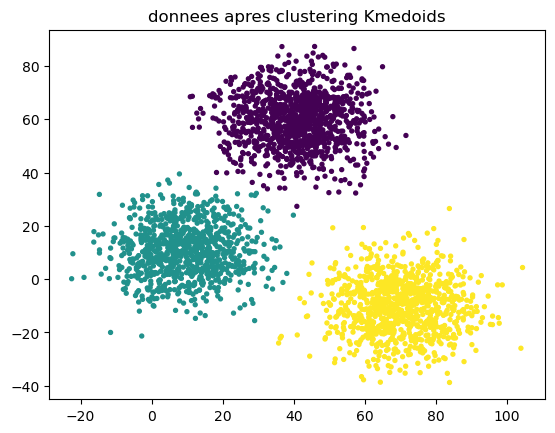

nb clusters =  4 , nb iter =  2 ,runtime =  97.5  ms


In [78]:
import kmedoids
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances

def kmedoid(k,data):
    tps1 = time.time()
    distmatrix = euclidean_distances(data)
    fp = kmedoids.fasterpam(distmatrix,k)
    tps2 = time.time()
    iter_kmed=fp.n_iter
    labels_kmed = fp.labels
    return labels_kmed,tps1,tps2,iter_kmed

labels_kmed,tps1,tps2,iter_kmed = kmedoid(3,datanp)
labelsKMedoids = labels_kmed
plt.scatter(f0,f1,c=labels_kmed,s=8)
plt.title("donnees apres clustering Kmedoids")
plt.show()

print("nb clusters = ",k,", nb iter = ",iter_kmed,",runtime = ",round((tps2-tps1)*1000,2)," ms")

In [79]:
silhouette_score(np.array(datanp),labels_kmed)

0.6945587736089913

Training 2 cluster algo...
Training 3 cluster algo...
Training 4 cluster algo...
Training 5 cluster algo...
Training 6 cluster algo...
Training 7 cluster algo...
Training 8 cluster algo...


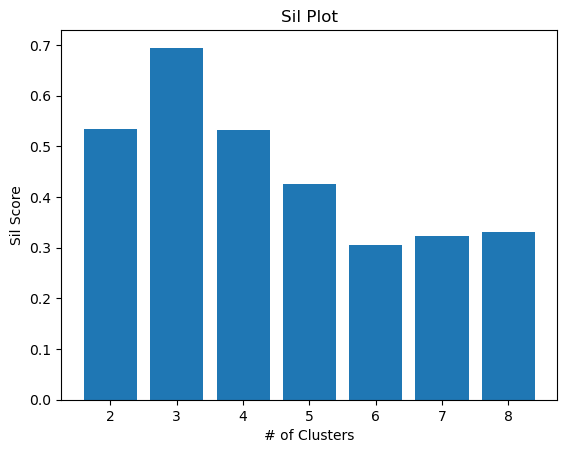

nb clusters =  3 , runtime =  1450.36  ms


In [80]:
from sklearn.metrics import silhouette_score

sil_score_list = []
tps1 = time.time()
min_cluster = 2
max_cluster = 9
for i in range(min_cluster,max_cluster):
    print('Training {} cluster algo...'.format(i))
    sil = silhouette_score(np.array(datanp),kmedoid(i,datanp)[0])
    sil_score_list.append(sil)
tps2 = time.time()
plt.bar([i for i in range(2,len(sil_score_list)+2)],sil_score_list)
plt.title('Sil Plot')
plt.xlabel('# of Clusters')
plt.ylabel('Sil Score')
plt.show()
nbMax = np.max(sil_score_list)
indexMax = sil_score_list.index(nbMax) + min_cluster
print("nb clusters = ",indexMax, ", runtime = ",round((tps2-tps1)*1000,2)," ms")

In [81]:
from sklearn.metrics import rand_score
from sklearn.metrics import mutual_info_score

print(rand_score(labelsKMean,labelsKMedoids))
print(mutual_info_score(labelsKMean,labelsKMedoids))

1.0
1.0929325398637173


# Clustering agglomératif